In [2]:
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


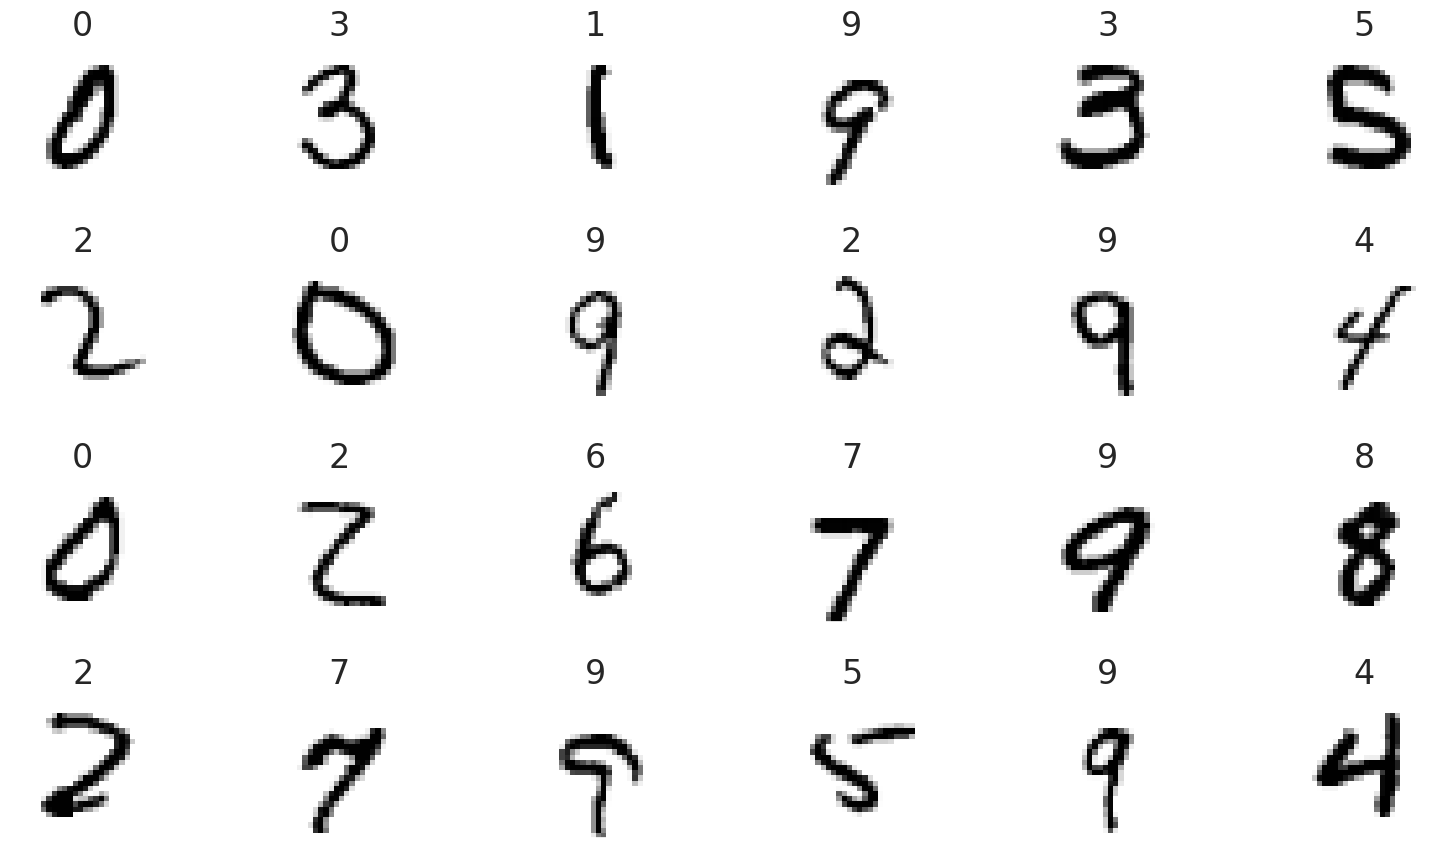

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=2)

import numpy as np
index = np.random.choice(np.arange(len(X_train)), 24, replace=False)
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 9))
for item in zip(axes.ravel(), X_train[index], y_train[index]):
  axes, image, target = item
  axes.imshow(image, cmap=plt.cm.gray_r)
  axes.set_xticks([]) # remove x-axis tick marks
  axes.set_yticks([]) # remove y-axis tick marks
  axes.set_title(target)
plt.tight_layout()

In [4]:
X_train = X_train.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))

X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [5]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)

print(y_train.shape)
print(y_train[0])

y_test = to_categorical(y_test)

print(y_test.shape)

(60000, 10)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
(10000, 10)


In [6]:
#Creating the Neural Network
from tensorflow.keras.models import Sequential
cnn = Sequential()

from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D

#Adding Layers to the Network
cnn.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu',input_shape=(28, 28, 1)))
#Adding a Pooling Layer
cnn.add(MaxPooling2D(pool_size=(2, 2)))

#Adding Another Convolutional Layer and Pooling Layer
cnn.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))

cnn.add(Flatten())

#Adding a Dense Layer to Reduce the Number of Features
cnn.add(Dense(units=128, activation='relu'))

#Adding Another Dense Layer to Produce the Final Output
cnn.add(Dense(units=10, activation='softmax'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       409,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 485,514 (1.85 MB)

 Trainable params: 485,514 (1.85 MB)

 Non-trainable params: 0 (0.00 B)

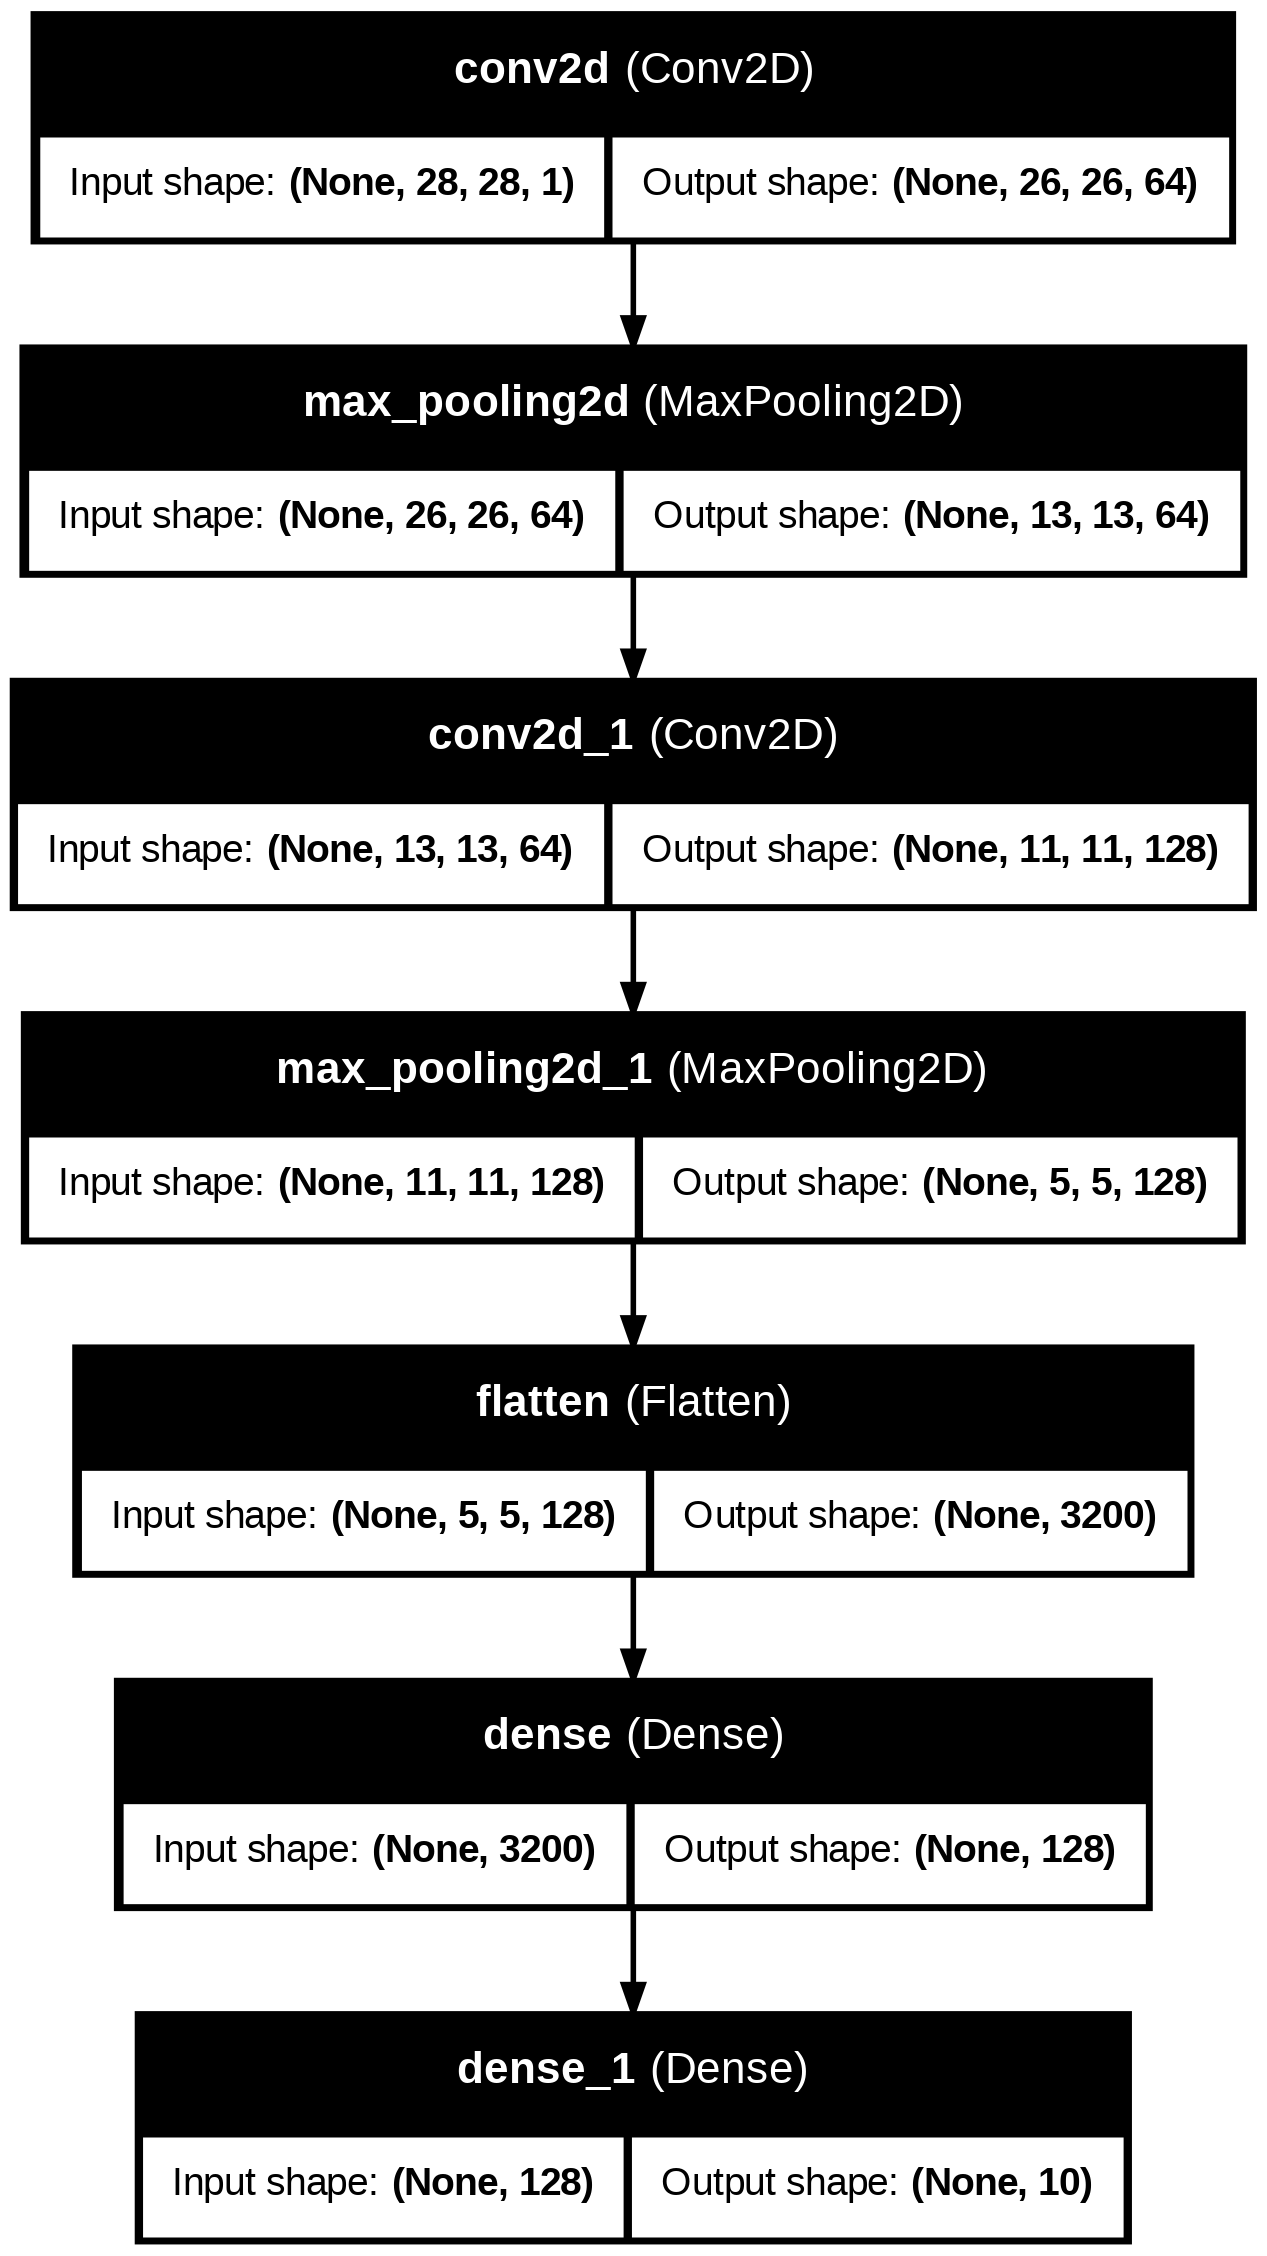

In [8]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(cnn, to_file='convnet.png', show_shapes=True, show_layer_names=True)
Image(filename='convnet.png')

In [9]:
#Compiling the Model
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#Training and Evaluating the Model
cnn.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

#Evaluating the Model
loss, accuracy = cnn.evaluate(X_test, y_test)

print(loss, accuracy)

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 100s 115ms/step - accuracy: 0.8938 - loss: 0.3419 - val_accuracy: 0.9867 - val_loss: 0.0462
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 144s 118ms/step - accuracy: 0.9859 - loss: 0.0449 - val_accuracy: 0.9900 - val_loss: 0.0361
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 143s 119ms/step - accuracy: 0.9912 - loss: 0.0271 - val_accuracy: 0.9902 - val_loss: 0.0346
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 139s 116ms/step - accuracy: 0.9939 - loss: 0.0186 - val_accuracy: 0.9905 - val_loss: 0.0372
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 143s 117ms/step - accuracy: 0.9951 - loss: 0.0139 - val_accuracy: 0.9885 - val_loss: 0.0479
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9839 - loss: 0.0452
0.03762240335345268 0.9866999983787537


In [11]:
predictions = cnn.predict(X_test)

print(y_test[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [12]:
for index, probability in enumerate(predictions[0]):
  print(f'{index}: {probability:.10%}')

0: 0.0000034076%
1: 0.0000001260%
2: 0.0000777337%
3: 0.0064040651%
4: 0.0000000000%
5: 0.0000001200%
6: 0.0000000000%
7: 99.9935090542%
8: 0.0000004007%
9: 0.0000036402%


In [13]:
#Locating the Incorrect Predictions
images = X_test.reshape((10000, 28, 28))
incorrect_predictions = []

for i, (p, e) in enumerate(zip(predictions, y_test)):
  predicted, expected = np.argmax(p), np.argmax(e)
  if predicted != expected:
    incorrect_predictions.append((i, images[i], predicted, expected))

len(incorrect_predictions)

133

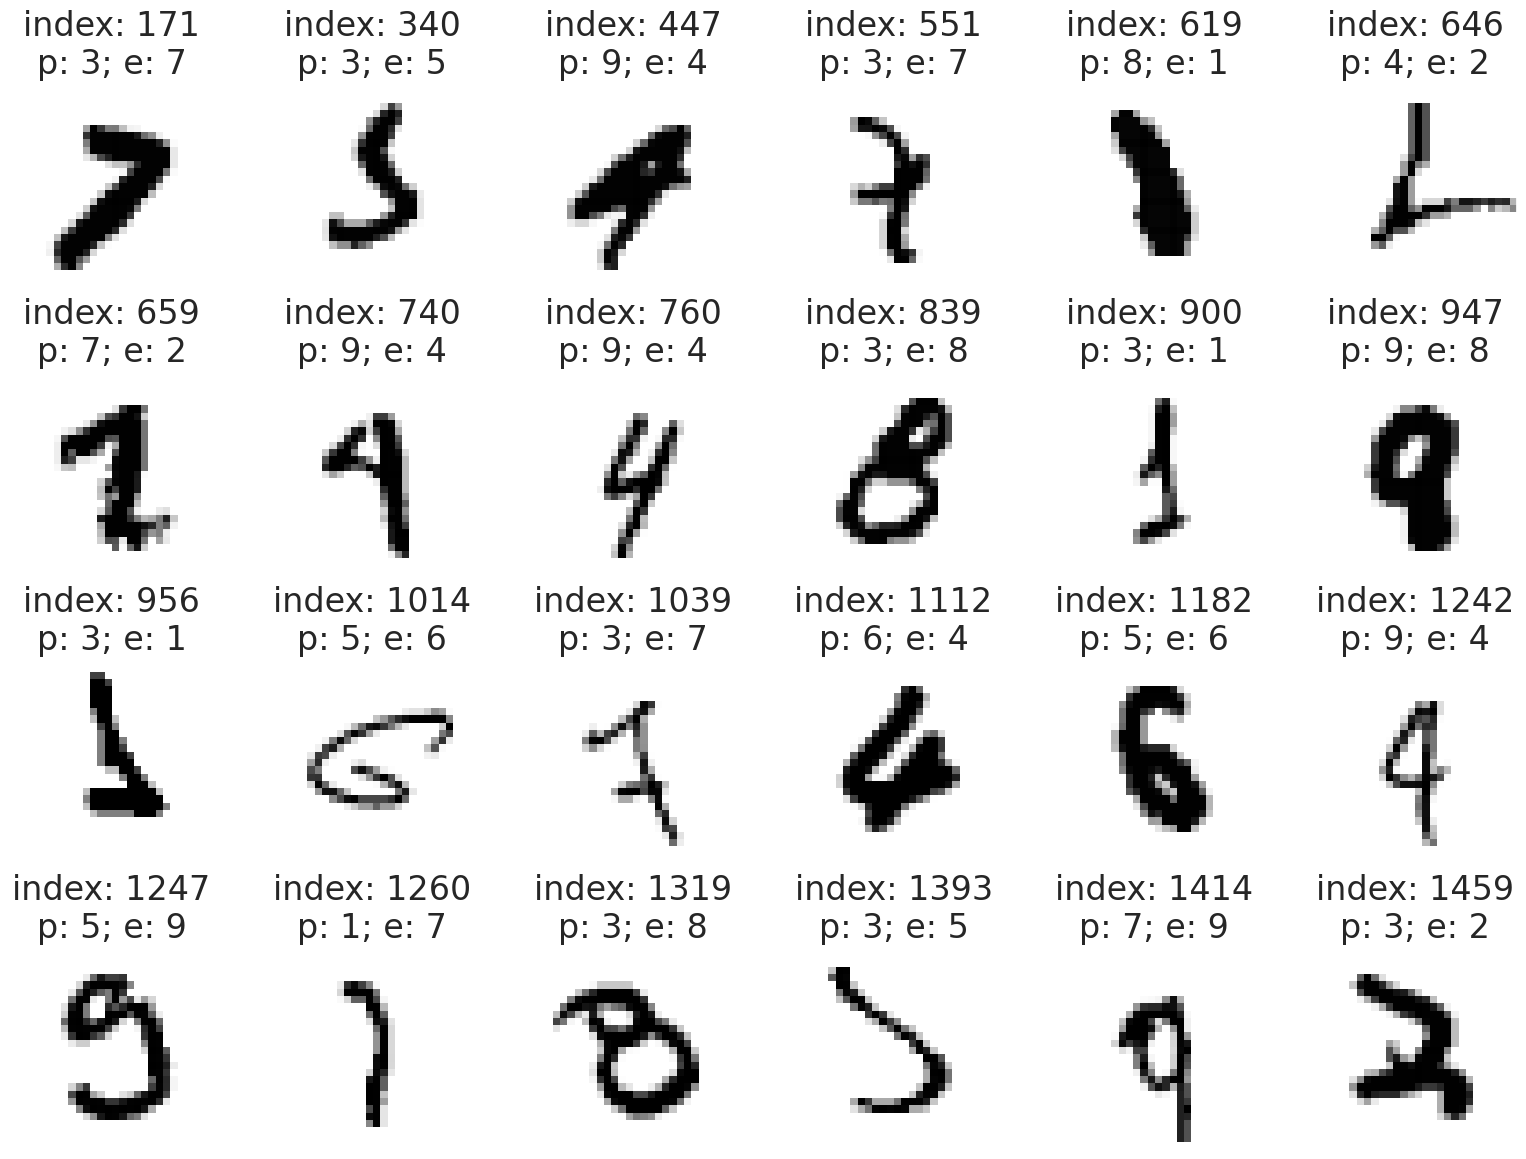

In [14]:
#Visualizing Incorrect Predictions
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 12))
for axes, item in zip(axes.ravel(), incorrect_predictions):
  index, image, predicted, expected = item
  axes.imshow(image, cmap=plt.cm.gray_r)
  axes.set_xticks([]) # remove x-axis tick marks
  axes.set_yticks([]) # remove y-axis tick marks
  axes.set_title(f'index: {index}\np: {predicted}; e: {expected}')
plt.tight_layout()

In [15]:
#Displaying the Probabilities for Several Incorrect Predictions
def display_probabilities(prediction):
  for index, probability in enumerate(prediction):
    print(f'{index}: {probability:.10%}')

display_probabilities(predictions[495])

0: 2.1632812917%
1: 0.0000004646%
2: 0.0066031054%
3: 1.1675643735%
4: 0.0000026411%
5: 0.0034296438%
6: 4.6917591244%
7: 0.0000000108%
8: 91.9637501240%
9: 0.0036110432%


In [16]:
#Displaying the Probabilities for Several Incorrect Predictions
display_probabilities(predictions[583])

0: 0.0000000012%
1: 0.0000002150%
2: 99.2254197598%
3: 0.0315596728%
4: 0.0000000000%
5: 0.0000000000%
6: 0.0000000000%
7: 0.7135381456%
8: 0.0294887839%
9: 0.0000000015%


In [17]:
#Displaying the Probabilities for Several Incorrect Predictions
display_probabilities(predictions[625])

0: 0.0000979571%
1: 0.0006196917%
2: 0.0000591823%
3: 0.0000018777%
4: 3.3211678267%
5: 0.0000135471%
6: 96.6779649258%
7: 0.0000000287%
8: 0.0000327760%
9: 0.0000501878%


In [4]:
#Saving and Loading a Model
cnn.save('mnist_cnn.h5')



from tensorflow.keras.models import load_model
cnn = load_model('mnist_cnn.h5')

NameError: name 'cnn' is not defined